## Baixando e importando as bases de dados do MovieLens

In [ ]:
import requests, zipfile, io

link = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'

In [ ]:
r = requests.get(link)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content")

In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_csv('ml-latest-small/movies.csv')
print(movies.shape)
movies.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Preparação da base de dados para utilização do modelo KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_style('dark')

In [ ]:
generos = movies['genres'].str.get_dummies()
generos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

## Utilizando o KMeans para agrupar os filmes por similaridade de gêneros e visualizando resultados de cada grupo

In [ ]:
X = generos_escalados
k = 17
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
       <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
       <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
       <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
       <Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
       <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
       <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
       <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
       <Axes: title={'center': '16'}>], dtype=object)

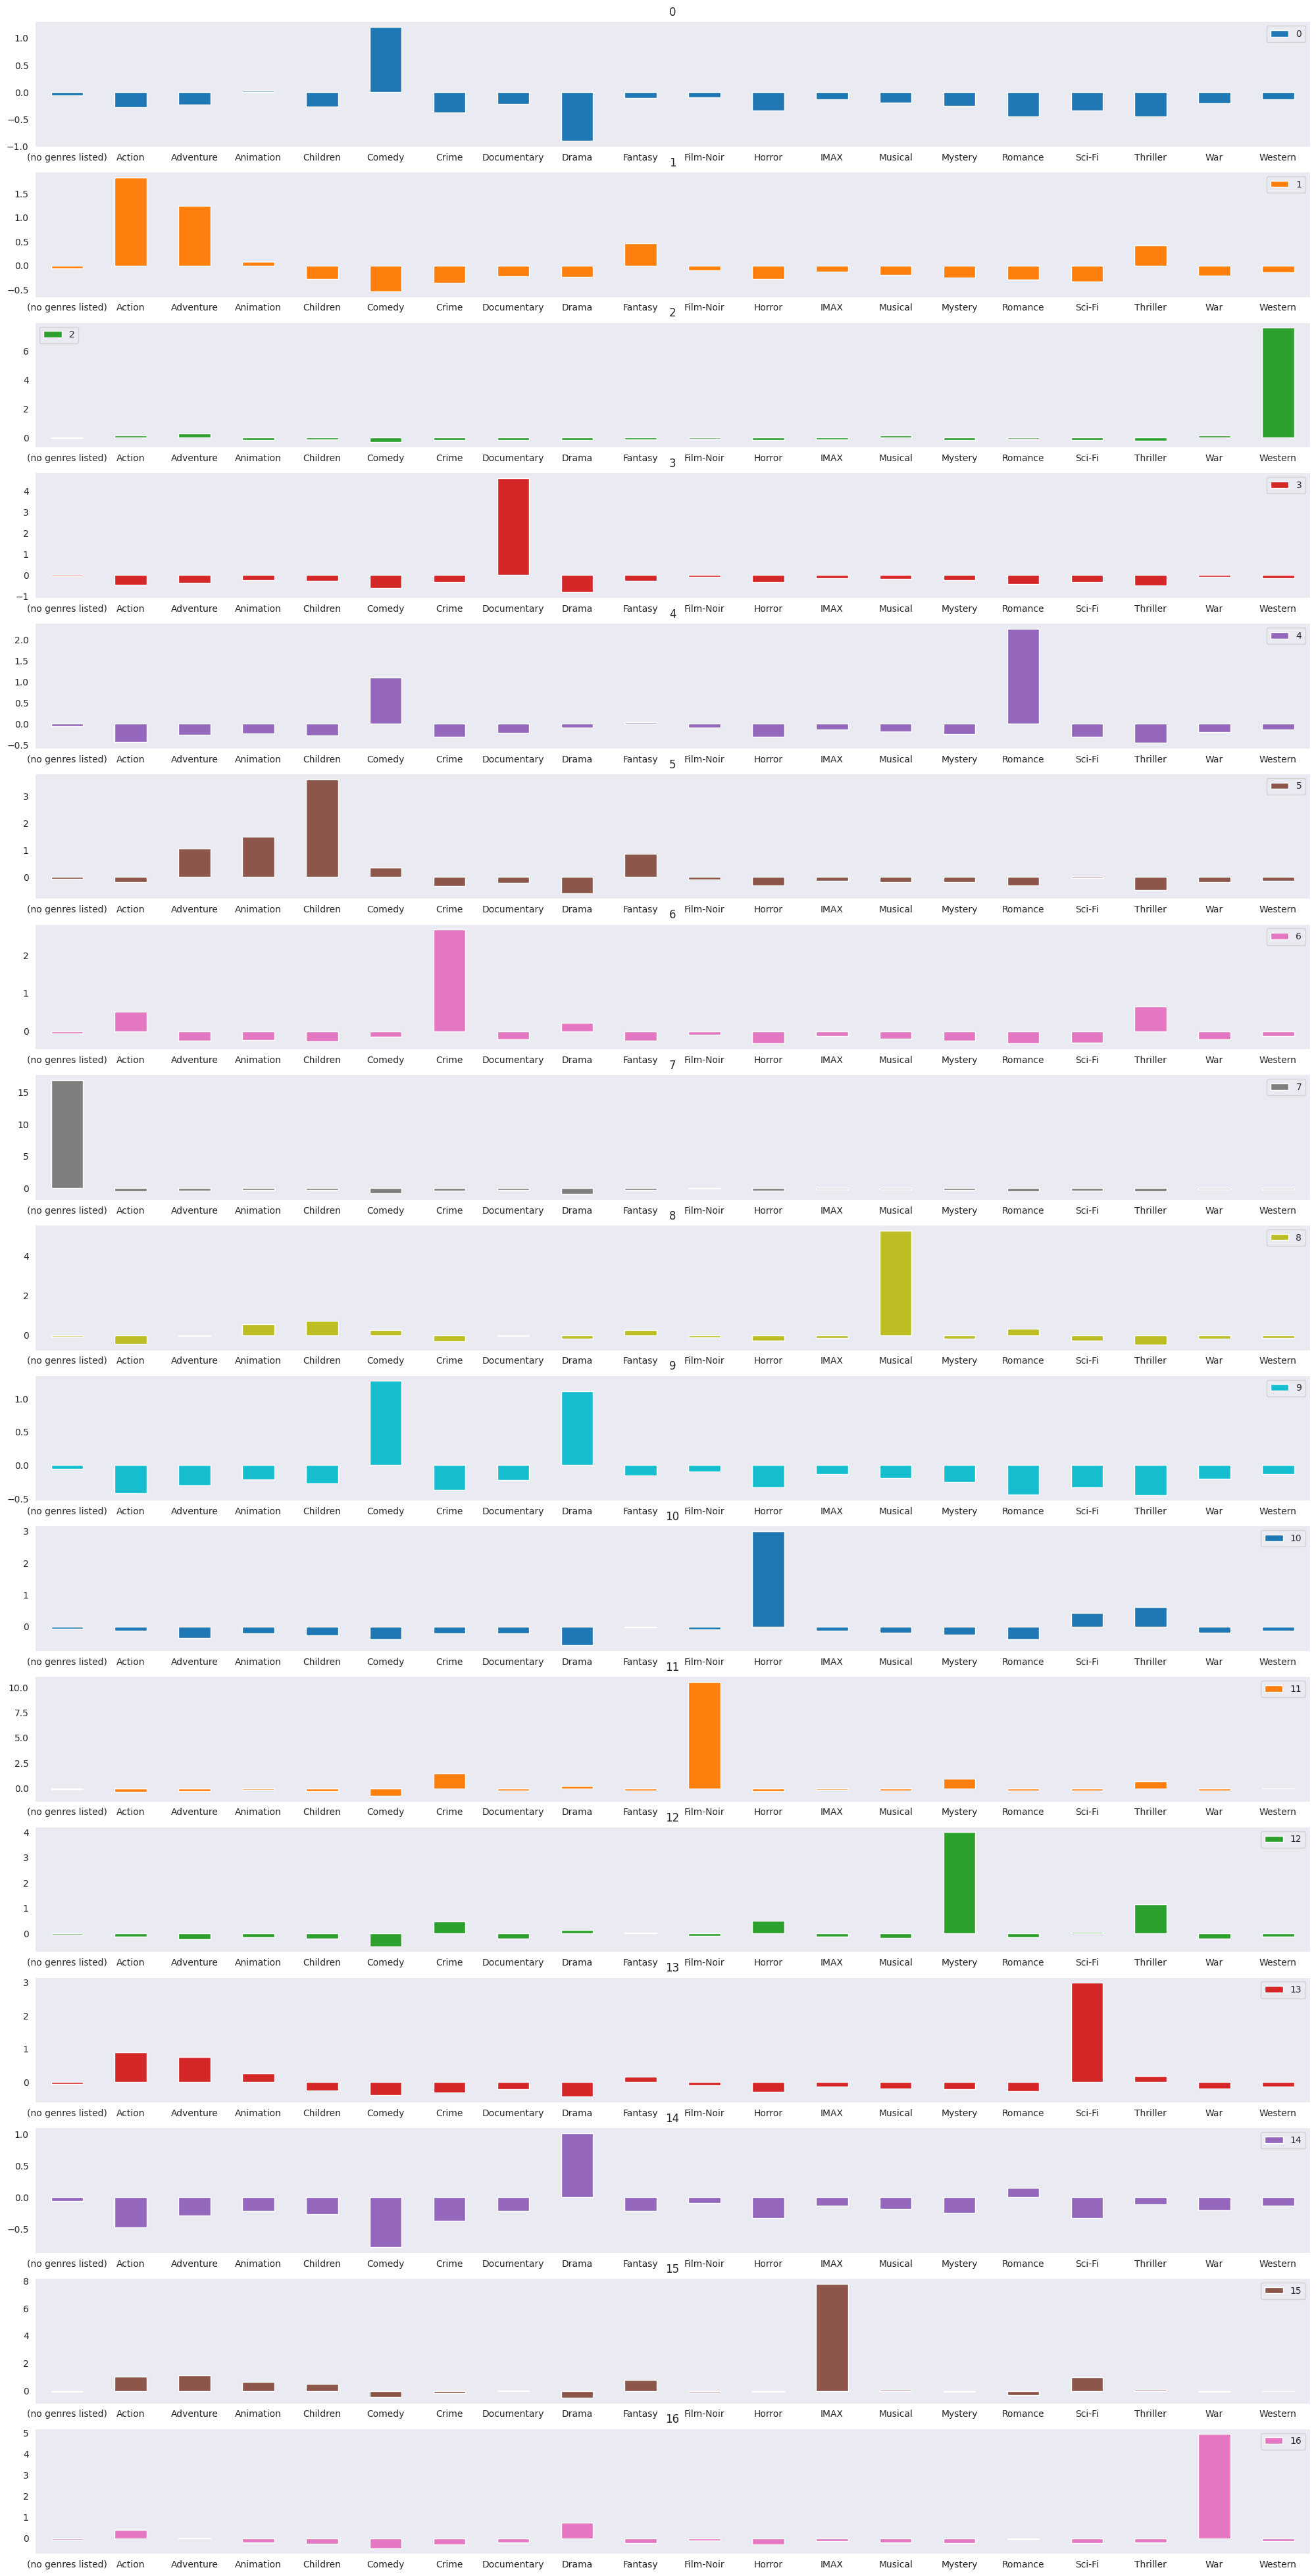

In [ ]:
distancia_centroides = kmeans.cluster_centers_

grupos = pd.DataFrame(distancia_centroides, columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25, 50),
                            sharex=False,
                            rot=0)

In [ ]:
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.280862,-0.231175,0.029464,-0.270451,1.205679,-0.374632,-0.217489,-0.900247,-0.106126,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.452258,-0.202020,-0.132065
1,-0.059180,1.836768,1.249359,0.085027,-0.270451,-0.533560,-0.353925,-0.217489,-0.229896,0.457604,-0.094926,-0.277464,-0.128397,-0.188419,-0.249986,-0.291000,-0.334435,0.428375,-0.202020,-0.132065
2,-0.059180,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010
3,-0.059180,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
4,-0.059180,-0.427377,-0.265851,-0.223384,-0.270451,1.099166,-0.307650,-0.217489,-0.091400,0.029703,-0.094926,-0.305580,-0.128397,-0.188419,-0.249986,2.259206,-0.301921,-0.448012,-0.202020,-0.132065
5,-0.059180,-0.175130,1.045181,1.504627,3.624718,0.361438,-0.324365,-0.217489,-0.593976,0.861974,-0.094926,-0.315738,-0.128397,-0.188419,-0.187598,-0.303823,-0.035530,-0.481986,-0.183113,-0.132065
6,-0.059180,0.521644,-0.242891,-0.220927,-0.265911,-0.148022,2.669289,-0.217489,0.229533,-0.248408,-0.094926,-0.322633,-0.128397,-0.188419,-0.249986,-0.309705,-0.304004,0.659410,-0.202020,-0.132065
7,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
8,-0.059180,-0.440080,-0.027959,0.563605,0.721543,0.248153,-0.297570,-0.034626,-0.181104,0.265214,-0.094926,-0.260343,-0.128397,5.307322,-0.182736,0.326878,-0.260790,-0.467270,-0.169412,-0.132065
9,-0.059180,-0.423108,-0.300892,-0.208175,-0.270451,1.262425,-0.374632,-0.217489,1.110807,-0.151851,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.444848,-0.202020,-0.132065


## Realizando a previsão de gêneros escolhidos aleatóriamente

In [ ]:
generos.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class List_to_kmeans(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        all_generos = ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
        'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
        'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
        'War', 'Western']
        dummies_generos = []
        for gen in all_generos:
            if gen in X:
                dummies_generos.append(1)
            else:
                dummies_generos.append(0)

        return [dummies_generos]

In [ ]:
generos_selecionados = ['Comedy', 'Romance']

In [ ]:
#generos_transform = transformar_lista_para_kmeans(generos_selecionados)
#generos_transform_scaled = scaler.transform(generos_transform)

all_pipe = Pipeline([('transform_list', List_to_kmeans()), ('scaller', scaler)])

generos_transform = all_pipe.transform(generos_selecionados)
predict = kmeans.predict(generos_transform)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
generos_transform

array([[-0.05917995, -0.48060698, -0.3859485 , -0.25867916, -0.27045122,
         1.26242494, -0.37463158, -0.21748944, -0.90024672, -0.29480988,
        -0.09492563, -0.3340552 , -0.12839708, -0.18841895, -0.24998637,
         2.25920562, -0.33443476, -0.49125897, -0.20201972, -0.13206534]])

In [ ]:
previsao = predict[0]
previsao

4

In [ ]:
movies['group'] = y_pred
movies.query(f'group=={previsao}')

,movieId,title,genres,group
2,3,Grumpier Old Men (1995),Comedy|Romance,4
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,4
6,7,Sabrina (1995),Comedy|Romance,4
10,11,"American President, The (1995)",Comedy|Drama|Romance,4
35,39,Clueless (1995),Comedy|Romance,4
...,...,...,...,...
9622,177939,"The Night Is Short, Walk on Girl (2017)",Animation|Romance,4
9628,178615,Front Cover (2016),Comedy|Drama|Romance,4
9639,179511,Emerald Green (2016),Adventure|Drama|Fantasy|Romance,4
9691,184349,Elsa & Fred (2005),Comedy|Drama|Romance,4


## Melhorando o modelo adicionando notas

In [ ]:
ratings = pd.read_csv('/content/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
media_notas = ratings.rename(columns={'rating':'mean_rating'}).groupby('movieId').mean()['mean_rating']
contagem_notas = ratings.rename(columns={'rating':'n_rating'}).groupby('movieId').count()['n_rating']

In [ ]:
movies.set_index('movieId', inplace=True)

In [ ]:
movies_ratings = pd.concat([movies, media_notas, contagem_notas], axis=1)

In [ ]:
movies_ratings.head()

,title,genres,group,mean_rating,n_rating
movieId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,5,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,4,3.259615,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,4,2.357143,7.0
5,Father of the Bride Part II (1995),Comedy,0,3.071429,49.0


In [ ]:
movies_ratings.to_csv("movies_ratings.csv")

# Refazendo a Predição classificando ordenando pelas melhores notas

In [ ]:
generos_selecionados = ['Adventure', 'Animation', 'Children']

In [ ]:
all_pipe = Pipeline([('transform_list', List_to_kmeans()), ('scaller', scaler)])

generos_transform = all_pipe.transform(generos_selecionados)
predict = kmeans.predict(generos_transform)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
group_predict = predict[0]
minimo_avaliacoes = 50
nota_minima = 3

In [ ]:
movies_ratings.query(f'group=={group_predict} and n_rating>{minimo_avaliacoes} and mean_rating>{nota_minima}').sort_values(by='mean_rating', ascending=False)

,title,genres,group,mean_rating,n_rating
movieId,,,,,
5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,5,4.155172,87.0
60069,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,5,4.057692,104.0
1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,5,4.035714,56.0
953,It's a Wonderful Life (1946),Children|Drama|Fantasy|Romance,5,4.034483,58.0
68954,Up (2009),Adventure|Animation|Children|Drama,5,4.004762,105.0
2804,"Christmas Story, A (1983)",Children|Comedy,5,3.972727,55.0
6377,Finding Nemo (2003),Adventure|Animation|Children|Comedy,5,3.960993,141.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,3.920930,215.0
4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,5,3.871212,132.0


## Salvando Modelo

In [ ]:
import pickle

In [ ]:
pickle.dump(kmeans, open('kmeans_algorithm.sav', 'wb'))
pickle.dump(all_pipe, open("pipeline.sav", "wb"))

## Montando Pipeline para ingestão dos dados via JSON

In [ ]:
import json

In [ ]:
kmeans_loaded = pickle.load(open('kmeans_algorithm.sav', 'rb'))
pipe_loaded = pickle.load(open('pipeline.sav', 'rb'))

In [ ]:
str_json = {
    'generos':['Comedy', 'Romance'],
    'n_min_aval':50,
    'rating_min_aval':3
}

str_json = json.dumps(str_json)

In [ ]:
params = eval(str_json)
generos_pipe = all_pipe.transform(params['generos'])
group_predict = kmeans.predict(generos_pipe)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
movies_recomended = movies_ratings.query(f'group=={group_predict} and n_rating>{params["n_min_aval"]} and mean_rating>{params["rating_min_aval"]}').sort_values(by='mean_rating', ascending=False)
movies_recomended

,title,genres,group,mean_rating,n_rating
movieId,,,,,
4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,4,4.183333,120.0
1247,"Graduate, The (1967)",Comedy|Drama|Romance,4,4.063291,79.0
6711,Lost in Translation (2003),Comedy|Drama|Romance,4,4.033784,74.0
1265,Groundhog Day (1993),Comedy|Fantasy|Romance,4,3.944056,143.0
1230,Annie Hall (1977),Comedy|Romance,4,3.870690,58.0
1307,When Harry Met Sally... (1989),Comedy|Romance,4,3.858824,85.0
7147,Big Fish (2003),Drama|Fantasy|Romance,4,3.833333,69.0
6942,Love Actually (2003),Comedy|Drama|Romance,4,3.788136,59.0
2396,Shakespeare in Love (1998),Comedy|Drama|Romance,4,3.777174,92.0


In [ ]:
movies_json = movies_recomended.head(10).to_json()

In [ ]:
movies_json

'{"title":{"4973":"Amelie (Fabuleux destin d\'Am\\u00e9lie Poulain, Le) (2001)","1247":"Graduate, The (1967)","6711":"Lost in Translation (2003)","1265":"Groundhog Day (1993)","1230":"Annie Hall (1977)","1307":"When Harry Met Sally... (1989)","7147":"Big Fish (2003)","6942":"Love Actually (2003)","2396":"Shakespeare in Love (1998)","56367":"Juno (2007)"},"genres":{"4973":"Comedy|Romance","1247":"Comedy|Drama|Romance","6711":"Comedy|Drama|Romance","1265":"Comedy|Fantasy|Romance","1230":"Comedy|Romance","1307":"Comedy|Romance","7147":"Drama|Fantasy|Romance","6942":"Comedy|Drama|Romance","2396":"Comedy|Drama|Romance","56367":"Comedy|Drama|Romance"},"group":{"4973":4,"1247":4,"6711":4,"1265":4,"1230":4,"1307":4,"7147":4,"6942":4,"2396":4,"56367":4},"mean_rating":{"4973":4.1833333333,"1247":4.0632911392,"6711":4.0337837838,"1265":3.9440559441,"1230":3.8706896552,"1307":3.8588235294,"7147":3.8333333333,"6942":3.7881355932,"2396":3.777173913,"56367":3.7692307692},"n_rating":{"4973":120.0,"124

In [ ]:
movies_recomended.to_json('movies-recommend.json')